In [1]:
import pynonthermal

In [2]:
# Kozma & Fransson 1992 Figure 2 - Pure-Oxygen Plasma
x_e = 1e-2
ions = [
    # (Z, ionstage, number_density)
    (8, 1, 1. - x_e),
    (8, 2, x_e),
]

sf = pynonthermal.SpencerFanoSolver(emin_ev=1, emax_ev=3000, npts=2000, verbose=True)
for Z, ionstage, n_ion in ions:
    sf.add_ionisation(Z, ionstage, n_ion)
    sf.add_ion_ltepopexcitation(Z, ionstage, n_ion, temperature=6000)

sf.solve(depositionratedensity_ev=5.e3)

sf.analyse_ntspectrum()


Setting up Spencer-Fano equation with 2000 energy points from 1.0 to 3000.0 eV...
  source is a box function from 2701.45 to 3000.00 eV with E_init 2850.73 [eV/s/cm3]
  including Z=8 ion_stage 1 (O I) ionisation with n_ion 9.9e-01
Reading artis_files/transitiondata.txt
Reading artis_files/adata.txt
  including Z=8 ion_stage 1 (O I) excitation with T 6000 K (ntransitions 248, maxnlevelslower 5, maxnlevelsupper 250)
  including Z=8 ion_stage 2 (O II) ionisation with n_ion 1.0e-02
  including Z=8 ion_stage 2 (O II) excitation with T 6000 K (ntransitions 307, maxnlevelslower 5, maxnlevelsupper 250)
 n_ion_tot: 1.00e+00 [/cm3]        (total ion density)
       n_e: 1.00e-02 [/cm3]        (free electron density)
       x_e: 1.00e-02 [/cm3]        (electons per nucleus)
deposition: 5000.00  [eV/s/cm3]
    n_e_nt: 4.06e+09 [/cm3]

====> Z= 8 ion_stage 1 O I (valence potential 13.6 eV)
               n_ion: 9.90e-01 [/cm3]
     n_ion/n_ion_tot: 0.99000
frac_ionisation_shell(n 2 l 1): 0.3604 (i

In [3]:
sf.get_frac_heating()

0.395633032972517

In [4]:
sf.get_frac_sum()

0.998967592013154

In [5]:
sf.get_ionisation_ratecoeff(8, 1)  # this can be multiplied by O I population to get ionisations per second

161.53701039565223

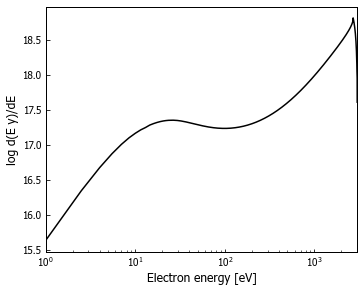

In [6]:
sf.plot_yspectrum()

In [ ]:
sf.plot_channels()